# Businesses & Venues Data Analysis of Boston City
In this project, K-means clustering and data analysis were performed to provide contractors information to know where best to locate their business. This platform provides information about the density of venues in Boston City and highlights the neighborhoods with high concentration in dining, social activities and local/small business. With the use of the map visualization and the data visualization methods, better decisions can be made by contractors looking to opening a business e.g. retail, food or service venue in the Boston area.

#### Importing and Exploring the Boston dataset

In [1]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3
def __iter__(self): return 0
body = client_2fd284d2c6e54359a0c487eaffb08497.get_object(Bucket='courseracapstone-donotdelete-pr-4cjjhipjdwlsnf',Key='Boston_Neighborhoods.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
boston_data=df_data_1
print(boston_data.shape)
boston_data.head()

(26, 7)


,OBJECTID,Name,Acres,Neighborhood_ID,SqMiles,ShapeSTArea,ShapeSTLength
0,27,Roslindale,1605.568237,15,2.51,6.993827e+07,53563.912597
1,28,Jamaica Plain,2519.245394,11,3.94,1.097379e+08,56349.937161
2,29,Mission Hill,350.853564,13,0.55,1.528312e+07,17918.724113
3,30,Longwood,188.611947,28,0.29,8.215904e+06,11908.757148
4,31,Bay Village,26.539839,33,0.04,1.156071e+06,4650.635493


#### Use geopy library to get the latitude and longitude values of neighborhoods in Boston City.


In [2]:
#Using geocoder package 
!pip install geocoder
import geocoder
def get_latilong(neighborhood_name):
    lati_long_coords = None
    while(lati_long_coords is None):
        g = geocoder.arcgis('{}, Boston, MA'.format(neighborhood_name))
        lati_long_coords = g.latlng
    return lati_long_coords
#check the coordinates for neighborhood_name    
get_latilong('Chinatown') #Check online 42.35° N, 71.06° W

     |████████████████████████████████| 102kB 7.2MB/s ta 0:00:011


[42.35251000000005, -71.06089999999995]

In [3]:
# Retrieving all the Neighborhood names
Neighborhood_names = boston_data['Name']
#Get the coordinates of the postal codes in original data using the function get_latilong
coords = [get_latilong(neighborhood_name) for neighborhood_name in Neighborhood_names.tolist() ]
coords
# Creating a dataframe for Latitude & Longitude
df_coords = pd.DataFrame(coords, columns=['Latitude', 'Longitude'])
#Adding the columns to the dataset 
boston_data= pd.concat([boston_data, df_coords], axis=1, sort=False)
boston_data.head()

,OBJECTID,Name,Acres,Neighborhood_ID,SqMiles,ShapeSTArea,ShapeSTLength,Latitude,Longitude
0,27,Roslindale,1605.568237,15,2.51,6.993827e+07,53563.912597,42.281813,-71.137111
1,28,Jamaica Plain,2519.245394,11,3.94,1.097379e+08,56349.937161,42.305850,-71.119095
2,29,Mission Hill,350.853564,13,0.55,1.528312e+07,17918.724113,42.335780,-71.109810
3,30,Longwood,188.611947,28,0.29,8.215904e+06,11908.757148,42.337249,-71.103733
4,31,Bay Village,26.539839,33,0.04,1.156071e+06,4650.635493,42.348168,-71.068471


In [4]:
#To define an instance of the geocoder, we need to define a user_agent. We will name our agent boston_explorer.
#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
address = 'Boston, MA'
geolocator = Nominatim(user_agent="boston_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Boston are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Boston are 42.3602534, -71.0582912.


#### Create a map of New York with neighborhoods superimposed on top.

In [5]:
# create map of Boston using latitude and longitude values
!pip install folium
#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
map_boston= folium.Map(location=[latitude, longitude], zoom_start=12)
# add markers to map
for lat, lng, label in zip(boston_data['Latitude'], boston_data['Longitude'], boston_data['Name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_boston)  
map_boston

     |████████████████████████████████| 102kB 6.4MB/s ta 0:00:011


### Utilizing the Foursquare API to explore the neighborhoods and segment them



In [6]:
CLIENT_ID = 'BNMOJWJQNS1DJ51CZP5BRKVWLQU4XON3UJTBHGJQLP40XYMB' # your Foursquare ID
CLIENT_SECRET = 'H5C2SNR5KNBGBPRWEXBTDBWVR0TVIDXWX4BUXXAG2WRA5FMB' # your Foursquare Secret
VERSION = '20200528' # Foursquare API version
LIMIT = 100 # limit of number of venues returned by Foursquare API i.e get the top 100 venues that are in each neighbourhood within a radius of 500 meters
radius=500


In [7]:
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=BNMOJWJQNS1DJ51CZP5BRKVWLQU4XON3UJTBHGJQLP40XYMB&client_secret=H5C2SNR5KNBGBPRWEXBTDBWVR0TVIDXWX4BUXXAG2WRA5FMB&v=20200528&ll=42.3602534,-71.0582912&radius=500&limit=100'

In [8]:
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
results = requests.get(url).json()

### Explore Neighborhoods in Boston


In [9]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [10]:
Boston_venues = getNearbyVenues(names=boston_data['Name'],
                                   latitudes=boston_data['Latitude'],
                                   longitudes=boston_data['Longitude']
                                  )


Roslindale
Jamaica Plain
Mission Hill
Longwood
Bay Village
Leather District
Chinatown
North End
Roxbury
South End
Back Bay
East Boston
Charlestown
West End
Beacon Hill
Downtown
Fenway
Brighton
West Roxbury
Hyde Park
Mattapan
Dorchester
South Boston Waterfront
South Boston
Allston
Harbor Islands


In [11]:
print(Boston_venues.shape)
Boston_venues.head()

(1263, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Roslindale,42.281813,-71.137111,Pleasant Cafe,42.278742,-71.136614,Italian Restaurant
1,Roslindale,42.281813,-71.137111,Pet Cabaret,42.281461,-71.133479,Pet Store
2,Roslindale,42.281813,-71.137111,J.J. Brannelly's,42.280286,-71.134635,Bar
3,Roslindale,42.281813,-71.137111,Todesca's Market & Deli,42.280865,-71.134507,Sandwich Place
4,Roslindale,42.281813,-71.137111,Golden House,42.281603,-71.133594,Chinese Restaurant


### Finding the number venues for each neighborhood

In [12]:
Boston_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Allston,8,8,8,8,8,8
Back Bay,100,100,100,100,100,100
Bay Village,43,43,43,43,43,43
Beacon Hill,39,39,39,39,39,39
Brighton,29,29,29,29,29,29
Charlestown,55,55,55,55,55,55
Chinatown,100,100,100,100,100,100
Dorchester,99,99,99,99,99,99
Downtown,79,79,79,79,79,79


### Finding unique categories which can be curated from all the returned venue

In [13]:
print('There are {} uniques categories.'.format(len(Boston_venues['Venue Category'].unique())))

There are 207 uniques categories.


### Analyze Each Neighborhood

In [14]:
# one hot encoding
dtt_onehot = pd.get_dummies(Boston_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
dtt_onehot['Neighborhood'] = Boston_venues['Neighborhood'] 

# move neighborhood column to the first column
col = dtt_onehot.pop("Neighborhood")
dtt_onehot.insert(0, col.name, col)

dtt_onehot.head()

,Neighborhood,ATM,Accessories Store,African Restaurant,American Restaurant,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Tunnel,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo Exhibit
0,Roslindale,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Roslindale,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Roslindale,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Roslindale,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Roslindale,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
dtt_onehot.shape

(1263, 207)

### Grouping rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [16]:

dtt_grouped = dtt_onehot.groupby('Neighborhood').mean().reset_index()
dtt_grouped.head()

,Neighborhood,ATM,Accessories Store,African Restaurant,American Restaurant,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Tunnel,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo Exhibit
0,Allston,0.0,0.00,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.00,0.000000,0.0
1,Back Bay,0.0,0.03,0.0,0.010000,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.010000,0.010000,0.010000,0.0,0.03,0.020000,0.0
2,Bay Village,0.0,0.00,0.0,0.023256,0.0,0.023256,0.0,0.023256,0.000000,...,0.0,0.023256,0.0,0.000000,0.023256,0.023256,0.0,0.00,0.000000,0.0
3,Beacon Hill,0.0,0.00,0.0,0.025641,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.00,0.000000,0.0
4,Brighton,0.0,0.00,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.034483,...,0.0,0.000000,0.0,0.034483,0.000000,0.000000,0.0,0.00,0.068966,0.0


In [17]:
dtt_grouped.shape

(26, 207)

### Printing  each neighborhood along with the top 5 most common venues

In [18]:
num_top_venues = 5

for hood in dtt_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = dtt_grouped[dtt_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Allston----
                  venue  freq
0                Market  0.12
1              Pharmacy  0.12
2                  Café  0.12
3        Sandwich Place  0.12
4  Fast Food Restaurant  0.12


----Back Bay----
               venue  freq
0     Clothing Store  0.08
1        Coffee Shop  0.04
2     Ice Cream Shop  0.03
3              Hotel  0.03
4  Accessories Store  0.03


----Bay Village----
                   venue  freq
0                Theater  0.12
1         Sandwich Place  0.07
2     Seafood Restaurant  0.07
3  Performing Arts Venue  0.05
4                  Hotel  0.05


----Beacon Hill----
                venue  freq
0         Pizza Place  0.08
1   French Restaurant  0.05
2  Italian Restaurant  0.05
3      Ice Cream Shop  0.03
4      Sandwich Place  0.03


----Brighton----
         venue  freq
0  Pizza Place  0.07
1  Yoga Studio  0.07
2  Coffee Shop  0.07
3          Pub  0.03
4  Record Shop  0.03


----Charlestown----
         venue  freq
0  Pizza Place  0.09
1   Donut Shop  

### Converting the data into a pandas dataframe

A function to sort the venues in descending order.

In [19]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Creating a new dataframe and displaying the top 10 venues for each neighborhood.

In [30]:
num_top_venues = 5
indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
import numpy as np
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = dtt_grouped['Neighborhood']

for ind in np.arange(dtt_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(dtt_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted



,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Allston,Bank,Pharmacy,Fried Chicken Joint,Fast Food Restaurant,Market
1,Back Bay,Clothing Store,Coffee Shop,Hotel,Bookstore,Ice Cream Shop
2,Bay Village,Theater,Seafood Restaurant,Sandwich Place,Hotel,Bakery
3,Beacon Hill,Pizza Place,Italian Restaurant,French Restaurant,Outdoor Sculpture,Kids Store
4,Brighton,Coffee Shop,Pizza Place,Yoga Studio,Taco Place,Nightclub
5,Charlestown,Pizza Place,Sports Bar,Park,Hotel,Bar
6,Chinatown,Chinese Restaurant,Bakery,Asian Restaurant,Coffee Shop,Sandwich Place
7,Dorchester,Coffee Shop,Sandwich Place,Italian Restaurant,Bakery,Hotel
8,Downtown,Historic Site,Sandwich Place,Hotel,American Restaurant,Park
9,East Boston,Bakery,Chinese Restaurant,Coffee Shop,American Restaurant,Sandwich Place


### Cluster Neighborhoods

/opt/conda/envs/Python36/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


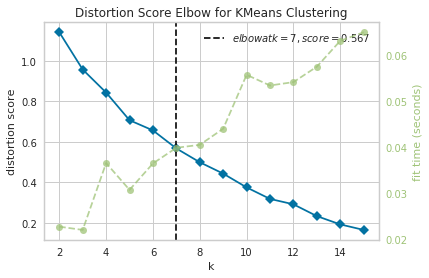

array([5, 2, 0, 0, 2, 2, 2, 2, 2, 2], dtype=int32)

In [31]:
!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
dtt_grouped_clustering = dtt_grouped.drop('Neighborhood', 1)

# run k-means clustering
model = KElbowVisualizer(KMeans(), k=15)
model.fit(dtt_grouped_clustering)
model.show()

#select cluster of 8 based on elbow method
kclusters = 8
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(dtt_grouped_clustering)
# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 
 


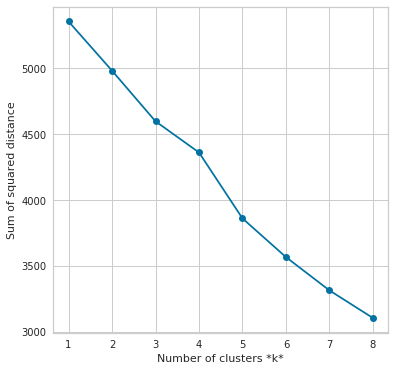

In [32]:
# Run the Kmeans algorithm and get the index of data points clusters
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
# Standardize the data
X_std = StandardScaler().fit_transform(dtt_grouped_clustering)

sse = []
list_k = list(range(1, 9))

for k in list_k:
    km = KMeans(n_clusters=k, random_state=0)
    km.fit(X_std)
    sse.append(km.inertia_)

# Plot sse against k
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

In [33]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
neighborhoods_venues_sorted

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
boston_lat_lng=boston_data.rename(columns={"Name": "Neighborhood"})
merged_data=boston_lat_lng.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
new_data=merged_data.drop(['OBJECTID','Neighborhood_ID','ShapeSTArea','ShapeSTLength'],axis=1)
new_data

,Neighborhood,Acres,SqMiles,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Roslindale,1605.568237,2.51,42.281813,-71.137111,4,Latin American Restaurant,Sandwich Place,Pet Store,Italian Restaurant,Chinese Restaurant
1,Jamaica Plain,2519.245394,3.94,42.305850,-71.119095,0,Park,Bakery,Pet Store,Art Gallery,Library
2,Mission Hill,350.853564,0.55,42.335780,-71.109810,2,Sandwich Place,Pharmacy,American Restaurant,Coffee Shop,Café
3,Longwood,188.611947,0.29,42.337249,-71.103733,2,Café,Coffee Shop,Falafel Restaurant,Sushi Restaurant,Sandwich Place
4,Bay Village,26.539839,0.04,42.348168,-71.068471,0,Theater,Seafood Restaurant,Sandwich Place,Hotel,Bakery
5,Leather District,15.639908,0.02,42.325223,-71.062247,2,American Restaurant,Department Store,Coffee Shop,Mobile Phone Shop,Chinese Restaurant
6,Chinatown,76.324410,0.12,42.352510,-71.060900,2,Chinese Restaurant,Bakery,Asian Restaurant,Coffee Shop,Sandwich Place
7,North End,126.910439,0.20,42.365490,-71.052970,0,Italian Restaurant,Pizza Place,Park,Bakery,Seafood Restaurant
8,Roxbury,2108.469072,3.29,42.330294,-71.089499,6,Donut Shop,BBQ Joint,Pharmacy,African Restaurant,American Restaurant
9,South End,471.535356,0.74,42.342560,-71.073580,2,Park,Wine Bar,American Restaurant,Gift Shop,Theater


In [34]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=13)

# set color scheme for the clusters

x = np.arange(kclusters)

ys = [i + x + (i*x)**2 for i in range(kclusters)]

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(new_data['Latitude'], new_data['Longitude'], new_data['Neighborhood'], new_data['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Examining the clusters

In [35]:
#Cluster 1
new_data.loc[new_data['Cluster Labels'] == 0, new_data.columns[[0] + list(range(5, new_data.shape[1]))]]


,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
1,Jamaica Plain,0,Park,Bakery,Pet Store,Art Gallery,Library
4,Bay Village,0,Theater,Seafood Restaurant,Sandwich Place,Hotel,Bakery
7,North End,0,Italian Restaurant,Pizza Place,Park,Bakery,Seafood Restaurant
14,Beacon Hill,0,Pizza Place,Italian Restaurant,French Restaurant,Outdoor Sculpture,Kids Store


In [36]:
#Cluster 2
new_data.loc[new_data['Cluster Labels'] == 1, new_data.columns[[0] + list(range(5, new_data.shape[1]))]]


,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
18,West Roxbury,1,Pizza Place,Home Service,Train Station,Bagel Shop,Zoo Exhibit


In [37]:
#Cluster 3
new_data.loc[new_data['Cluster Labels'] == 2, new_data.columns[[0] + list(range(5, new_data.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
2,Mission Hill,2,Sandwich Place,Pharmacy,American Restaurant,Coffee Shop,Café
3,Longwood,2,Café,Coffee Shop,Falafel Restaurant,Sushi Restaurant,Sandwich Place
5,Leather District,2,American Restaurant,Department Store,Coffee Shop,Mobile Phone Shop,Chinese Restaurant
6,Chinatown,2,Chinese Restaurant,Bakery,Asian Restaurant,Coffee Shop,Sandwich Place
9,South End,2,Park,Wine Bar,American Restaurant,Gift Shop,Theater
10,Back Bay,2,Clothing Store,Coffee Shop,Hotel,Bookstore,Ice Cream Shop
11,East Boston,2,Bakery,Chinese Restaurant,Coffee Shop,American Restaurant,Sandwich Place
12,Charlestown,2,Pizza Place,Sports Bar,Park,Hotel,Bar
13,West End,2,Hotel,Donut Shop,Pizza Place,Bar,Café
15,Downtown,2,Historic Site,Sandwich Place,Hotel,American Restaurant,Park


In [38]:
#Cluster 4
new_data.loc[new_data['Cluster Labels'] == 3, new_data.columns[[0] + list(range(5, new_data.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
20,Mattapan,3,Park,Ice Cream Shop,Pizza Place,Event Service,Business Service


In [39]:
#Cluster 5
new_data.loc[new_data['Cluster Labels'] == 4, new_data.columns[[0] + list(range(5, new_data.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Roslindale,4,Latin American Restaurant,Sandwich Place,Pet Store,Italian Restaurant,Chinese Restaurant


In [40]:
#Cluster 6
new_data.loc[new_data['Cluster Labels'] == 5, new_data.columns[[0] + list(range(5, new_data.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
24,Allston,5,Bank,Pharmacy,Fried Chicken Joint,Fast Food Restaurant,Market


In [41]:
#Cluster 7
new_data.loc[new_data['Cluster Labels'] == 6, new_data.columns[[0] + list(range(5, new_data.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
8,Roxbury,6,Donut Shop,BBQ Joint,Pharmacy,African Restaurant,American Restaurant


In [42]:
#Cluster 8
new_data.loc[new_data['Cluster Labels'] == 7, new_data.columns[[0] + list(range(5, new_data.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
19,Hyde Park,7,Liquor Store,Pizza Place,Gym / Fitness Center,Mexican Restaurant,Buffet


### Importing and exploring the Community Center dataset in Boston

In [43]:
body = client_2fd284d2c6e54359a0c487eaffb08497.get_object(Bucket='courseracapstone-donotdelete-pr-4cjjhipjdwlsnf',Key='Community_Centers.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )
df_data_2 = pd.read_csv(body)
df_data_2.head()
community_center_data=df_data_2
counts_cc=community_center_data['NEIGH'].value_counts()

Text(0.5, 0, 'Boston Neighborhood')

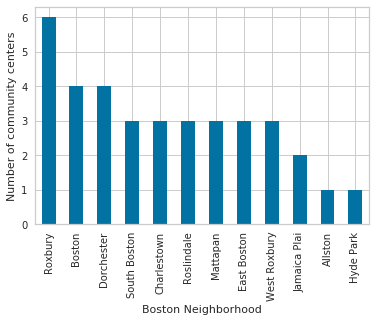

In [44]:
pd.DataFrame(counts_cc).plot(kind='bar',legend=None)
plt.ylabel('Number of community centers')
plt.xlabel('Boston Neighborhood')


### Importing and exploring the Business dataset in Boston

In [45]:
body = client_2fd284d2c6e54359a0c487eaffb08497.get_object(Bucket='courseracapstone-donotdelete-pr-4cjjhipjdwlsnf',Key='3fc08ca2-9baf-4d77-b03a-aaed1cc936ed.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_3 = pd.read_csv(body)
df_data_3.head()
x=df_data_3[['business_area_1','address']]
boston=x[x['address'].str.contains("MA")]


In [46]:
Roslindale=boston[boston['address'].str.contains("Roslindale")] 
Roslindale[['business_area_1']].count()

business_area_1    7
dtype: int64

In [47]:
JamaicaPlain=boston[boston['address'].str.contains("Jamaica Plain")]
JamaicaPlain[['business_area_1']].count()

business_area_1    11
dtype: int64

In [48]:
Roxbury=boston[boston['address'].str.contains("Roxbury")]
Roxbury[['business_area_1']].count()

business_area_1    29
dtype: int64

In [49]:
EastBoston=boston[boston['address'].str.contains("East Boston")]
EastBoston[['business_area_1']].count()

business_area_1    5
dtype: int64

In [50]:
Charlestown=boston[boston['address'].str.contains("Charlestown")]
Charlestown[['business_area_1']].count()

business_area_1    3
dtype: int64

In [51]:
LeatherDistrict=boston[boston['address'].str.contains("West Roxbury")]
LeatherDistrict[['business_area_1']].count()

business_area_1    9
dtype: int64

In [52]:
Brighton=boston[boston['address'].str.contains("Brighton")]
Brighton[['business_area_1']].count()

business_area_1    3
dtype: int64

In [53]:
HydePark=boston[boston['address'].str.contains("Hyde Park")]
HydePark[['business_area_1']].count()

business_area_1    15
dtype: int64

In [54]:
Mattapan=boston[boston['address'].str.contains("Mattapan")]
Mattapan[['business_area_1']].count()

business_area_1    14
dtype: int64

In [55]:
Dorchester=boston[boston['address'].str.contains("Dorchester")]
Dorchester[['business_area_1']].count()

business_area_1    57
dtype: int64

In [56]:
SouthBoston=boston[boston['address'].str.contains("South Boston")]
SouthBoston[['business_area_1']].count()

business_area_1    4
dtype: int64

In [57]:
Allston=boston[boston['address'].str.contains("Allston")]
Allston[['business_area_1']].count()

business_area_1    2
dtype: int64

Text(0.5, 0, 'Boston Neighborhoods')

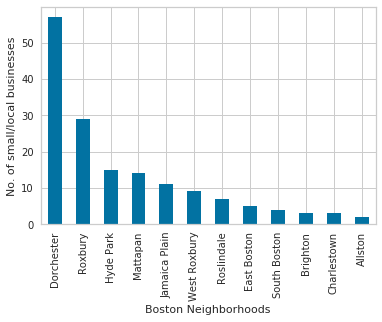

In [58]:
import matplotlib.pyplot as plt
data = {'Boston Neighborhoods':  ['Allston', 'South Boston','Dorchester',"Mattapan","Hyde Park","Brighton","West Roxbury","Charlestown","Roslindale","Roxbury","East Boston","Jamaica Plain"],
        'Number of small/local businesses': [2, 4,57,14,15,3,9,3,7,29,5,11]}
df = pd.DataFrame (data, columns = ['Boston Neighborhoods','Number of small/local businesses'])
x=df.sort_values(by="Number of small/local businesses",axis=0, ascending=False)
x.set_index("Boston Neighborhoods", inplace=True)
viol_plot=x.plot(kind="bar",legend=0)
viol_plot.set_ylabel('No. of small/local businesses')
viol_plot.set_xlabel('Boston Neighborhoods')

### Importing and exploring the Food restaurant dataset in Boston

In [59]:
body = client_2fd284d2c6e54359a0c487eaffb08497.get_object(Bucket='courseracapstone-donotdelete-pr-4cjjhipjdwlsnf',Key='tmpzsp9cm25.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_4 = pd.read_csv(body)
df_data_4.head()
# sorting by business name 
data=df_data_4.sort_values("businessname") 
  
# dropping ALL duplicte values 
data.drop_duplicates(subset ="businessname", keep = False, inplace = True) 

active_food=data[data['licstatus'].str.contains("Active")]
# displaying data 
active_food.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (1,23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,businessname,dbaname,legalowner,namelast,namefirst,licenseno,issdttm,expdttm,licstatus,licensecat,...,violdttm,violstatus,statusdate,comments,address,city,state,zip,property_id,location
1754,4 Brothers Market,NaN,NaN,4 Brothers Market LLC,Att: Accounts Payable,381991,2018-12-21 14:44:33,2020-12-31 23:59:00,Active,RF,...,,NaN,NaN,,3997 Washington ST,Roslindale,MA,02131,158313.0,"(42.292906000, -71.121490000)"
4821,A. Butter,NaN,NaN,A. Butter LLC,Att: Accounts Payable,418279,2019-12-31 08:10:36,2020-12-31 23:59:00,Active,FS,...,,NaN,NaN,,633 Centre ST,Jamaica Plain,MA,02130,344812.0,"(42.313746000, -71.114645000)"
8112,Ajeen,NaN,TEDESCHI FOOD SHOPS INC.,Boulos,Simon,387090,2020-01-28 08:09:46,2020-12-31 23:59:00,Active,FT,...,,NaN,NaN,,1219 Commonwealth AVE,Allston,MA,02134,157940.0,"(42.350755000, -71.130870000)"
11045,Ali Baba,NaN,NaN,Erdem LLC,Att: Accounts Payable,422123,2020-02-13 09:39:22,2020-12-31 23:59:00,Active,FS,...,,NaN,NaN,,99A Cambridge ST,Charlestown,MA,02129,351905.0,NaN
12017,Alma Gaucha,NaN,NaN,Fogao Guacho LLC,Att: Accounts Payable,423102,2020-02-14 15:58:57,2020-12-31 23:59:00,Active,FS,...,,NaN,NaN,,401 D ST,Boston,MA,02210,355423.0,NaN


In [60]:
food_cc=active_food['city'].value_counts()

Text(0.5, 0, 'Boston Neighborhood')

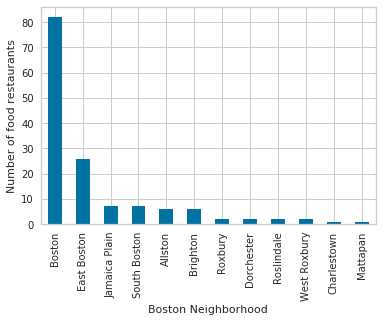

In [61]:
x=pd.DataFrame(food_cc).plot(kind='bar',legend=None)
x.set_ylabel('Number of food restaurants')
x.set_xlabel('Boston Neighborhood')